# Titanic Machine Learning
All aboard the Titanic... will you be one of the lucky ones that survives? In this machine learning exercise, I intend to find out. I'm using the standard [Kaggle Titanic dataset](https://www.kaggle.com/c/titanic) to practice using a classifier.

This notebook is organized as follows:
- Preliminary Data Analysis
- Further Data Cleaning
    - Age
    - Port of Embarkment
    - Cabin
- Further Data Analysis
    - Useful Functions
    - Age
    - Passenger Class
    - Siblings and Spouses

## Exploratory Data Analysis

In [1]:
# Load in the libraries we'll need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #<-- get rid of

In [51]:
# Global constants
FIG_WIDTH_INCHES = 5
FIG_HEIGHT_INCHES = 5
LABEL_SIZE_POINT = 12
TICK_LABEL_SIZE_POINT = 11
TITLE_SIZE_POINT = 14
TITANIC_COLOUR = "#31343F"
SURVIVED_COLOUR = "#86BD8A"
DID_NOT_SURVIVE_COLOUR = "#BF6060"

In [3]:
# Display options

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
# Load titanic data
def load_titanic_data():
    train= pd.read_csv('./train.csv')
    test = pd.read_csv('./test.csv')
    return [train, test]

In [5]:
train_data = load_titanic_data()[0]
test_data = load_titanic_data()[1]

In [6]:
# Peruse the data
train_data.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We notice that there some missing ages, and that the cabin information is missing a lot. Use the `info()` method to get an idea of how complete the data is.

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Let's look at how the variables are correlated.

In [8]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Among the numerical variables, the Survived variable is most strongly correlated with the Pclass and the Fare variable. We expect this: the lower the passenger's class number the more likely they are to survive (e.g. First class passengers are more likely to survive than third class). The more a passenger paid for their ticket, the more likely they are to survive. Overall, nothing mysterious here.

Overall, this is a clean data set apart from the Cabin variable and a few missing ages. Oddly enough, there are a couple people who's port of embarkment is not known. Let's deal with these.

## Further Data Cleaning
## Age
Get the mean age by gender fill any NaNs for age with the appropriate mean value. For example, if a woman's age is missing, replace it with the mean age of all women aboard the Titanic.

There are more complicated imputations: we could account for passenger class, but let's keep it simple for now.

In [9]:
# Get unique gender values
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
# Get the mean age of men and women
age_by_gender = train_data[
    [
        "Sex",
        "Age"
    ]
].groupby("Sex").agg(
    {
        "Age": "mean"
    }
)
age_by_gender

,Age
Sex,
female,27.915709
male,30.726645


Males on the titanic, on average, were older than women.

In [11]:
# Impute the missing ages
train_data.loc[
    (
        train_data["Sex"] == "male"
    )
    & (
        pd.isna(train_data["Age"])
    ),
    "Age"
] = age_by_gender.loc[
    "male",
    "Age"
]

train_data.loc[
    (
        train_data["Sex"] == "female"
    )
    & (
        pd.isna(train_data["Age"])
    ),
    "Age"
] = age_by_gender.loc[
    "female",
    "Age"
]

In [12]:
# Check that there are no more missing Age values.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Port of Embarkment
Let's see what are the two records whose port of embarkents aren't known.

In [13]:
train_data[
    pd.isna(train_data["Embarked"])
]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Looking up these passengers, it seems that [Miss Amelie Icard](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html) embarked at Southampton, and [Mrs. Martha Evelyn Stone](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html) embarked at Southampton. Fill in these values.

In [14]:
# Since both passengers embarked at Southampton, just set the missing values to "S".
train_data.loc[
    pd.isna(train_data["Embarked"]),
    "Embarked"
] = "S"

In [15]:
# Check that we've fixed our missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cabin
This one is trickier. There are 687 missing values. We *could* go through and find the info for each missing passenger and fix each record. But let's see if we can be smarter, and get away without using this feature. But this isn't necessarily even possible. For example [Mr. Owen Harris Braund](https://www.encyclopedia-titanica.org/titanic-victim/owen-harris-braund.html)'s cabin information is missing, yet his cabin doesn't seem to be known.

In [16]:
train_data.loc[
    pd.isna(train_data["Cabin"])
]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,NaN,S


In [17]:
# Take a look at the unique cabin values
train_data["Cabin"].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
C22 C26        3
              ..
B71            1
D7             1
E34            1
B4             1
E10            1
Name: Cabin, Length: 147, dtype: int64

This doesn't seem to help us. For now, we'll leave the Cabin feature as it is, and just leave it unused in the classification.

## Further Data Analysis
Let's have some fun and make some charts.
### Useful Functions

In [84]:
# Define a plot histogram function
def plot_histogram(
    axis, # matplotlib axis object
    data_frame, # data frame of which we want a histogram of one columns
    data_column_string, # the string that identifies the column in data_frame we want to visualize
    bins_list, # a list of the bins we want to use. Make sure this is a list.
    colour_string, # A colour, as a hex code (as a string), for the colour of the bars in the histogram
    xlabel_string, # String of the x-axis label
    ylabel_string, # String of the y-axis label
    title_string, # String of the title
    label_size_num=12, # Size of the x- and y-labels
    title_size_num=14, # Size of the title
    tick_label_size_num=11, # Size of the x- and y-tick labels
    padding_num=20, # Padding of the titles and labels
    edge_colour_string="w", # Colour, as a hex code (as a string), for the edge colour of the bars.
    linewidth_num=1, # Size of the edges outlining the bars, in points
    alignment_string="mid", # With "mid" bars are centred between bin edges. Try "left" or "right"
    density_flag=False # Plot a probability density function?
):
    [bins, values, patches] = axis.hist(
        x=data_frame[
            data_column_string
        ],
        bins=bins_list,
        color=colour_string,
        edgecolor=edge_colour_string,
        linewidth=linewidth_num,
        density=density_flag,
        align=alignment_string
    )
    
    # Set x- and y-labels and title
    axis.set_xlabel(
        xlabel_string,
        size=label_size_num,
        labelpad=padding_num
    )
    axis.set_ylabel(
        ylabel_string,
        size=label_size_num,
        labelpad=padding_num
    )
    axis.set_title(
        title_string,
        size=title_size_num,
        pad=padding_num
    )
    
    # Set x- and y-ticklabel sizes
    for x in axis.get_xticklabels():
        x.set_size(tick_label_size_num)

    for y in axis.get_yticklabels():
        y.set_size(tick_label_size_num)
        
    return [bins, values, patches]


### Age
Age is a continuous variable, so let's make a histogram of it.

In [20]:
# Get the minimum and maximum of the training data
print(train_data["Age"].min())
print(train_data["Age"].max())

0.42
80.0


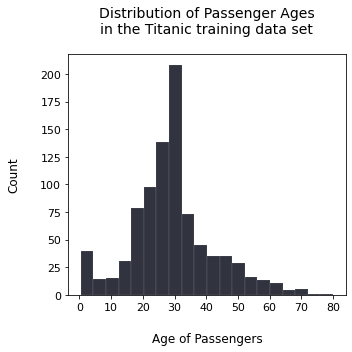

In [78]:
fig = plt.figure(
    figsize=(
        FIG_WIDTH_INCHES,
        FIG_HEIGHT_INCHES
    )
)
ax = fig.add_subplot(111)
plot_histogram(
    axis=ax,
    data_frame=train_data,
    data_column_string="Age",
    bins_list=20,
    colour_string=TITANIC_COLOUR,
    xlabel_string="Age of Passengers",
    ylabel_string="Count",
    title_string="Distribution of Passenger Ages\nin the Titanic training data set",
    linewidth_num=0.1,
)
plt.tight_layout()
plt.show()

There are some children (ages zero to ten), lots of people aged about 18 to 40, and some people aged 40 and above. We remark a spike at about 27 and 30. Plot the histogram for age, but this time, for passengers who died and who didn't.

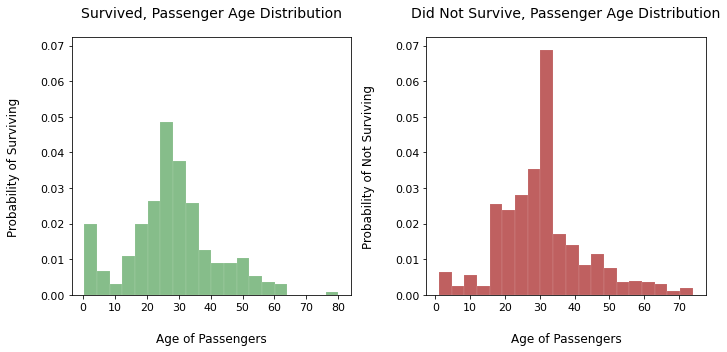

In [80]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(
    FIG_WIDTH_INCHES * 2, 
    FIG_HEIGHT_INCHES
)
plot_histogram(
    axis=ax1,
    data_frame=train_data[
        train_data["Survived"]==1
    ],
    data_column_string="Age",
    bins_list=20,
    colour_string=SURVIVED_COLOUR,
    xlabel_string="Age of Passengers",
    ylabel_string="Probability of Surviving",
    title_string="Survived, Passenger Age Distribution",
    linewidth_num=0.1,
    density_flag=True
)

plot_histogram(
    axis=ax2,
    data_frame=train_data[
        train_data["Survived"]==0
    ],
    data_column_string="Age",
    bins_list=20,
    colour_string=DID_NOT_SURVIVE_COLOUR,
    xlabel_string="Age of Passengers",
    ylabel_string="Probability of Not Surviving",
    title_string="Did Not Survive, Passenger Age Distribution",
    linewidth_num=0.1,
    density_flag=True
)

# Adjust the x-limits on the first plot to match that of the second
ax1.set_ylim(
    ax2.get_ylim()
)
plt.tight_layout()
plt.show()

We see a lot of 30 year olds perished, as did a lot of people aged about 20-30. We see a lot of 25 and 30 year olds also survived. Among the survivors, children (age 0 to 10) represent a larger fraction of the population that survived as opposed to the population that perished. This makes sense, as we'd expect people to try to save children. We also remark that more people aged (approximately) 23 to 26 survived, and a lot of people aged 30 to 33 perished. This sort of hints that more women (mean aged 28) survived than did men (mean aged 31).

This suggests that age is a determinant of a passenger's survival.

### Passenger Class

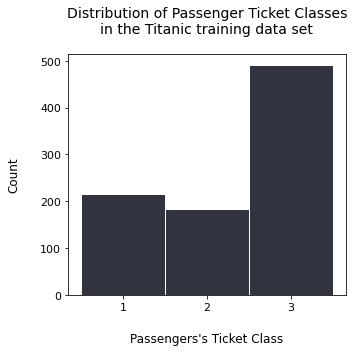

In [87]:
# Plot the distribution of passenger class
fig = plt.figure(
    figsize=(
        FIG_WIDTH_INCHES,
        FIG_HEIGHT_INCHES
    )
)
ax = fig.add_subplot(111)
plot_histogram(
    axis=ax,
    data_frame=train_data,
    data_column_string="Pclass",
    bins_list=[1, 2, 3, 4],
    colour_string=TITANIC_COLOUR,
    xlabel_string="Passengers's Ticket Class",
    ylabel_string="Count",
    title_string="Distribution of Passenger Ticket Classes\nin the Titanic training data set",
    linewidth_num=1,
    alignment_string="left"
)
ax.set_xticks([1, 2, 3])
plt.tight_layout()
plt.show()

There were significantly more third class passengers than first or second class passengers. Let's take a look at the distribution of passenger class among the population that survived, and that, which didn't.

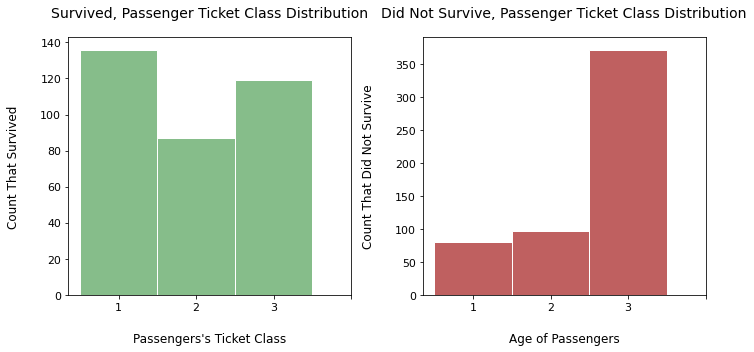

In [97]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(
    FIG_WIDTH_INCHES * 2, 
    FIG_HEIGHT_INCHES
)
# Define a bin list for classes 1, 2, 3
bin_list = [1, 2, 3, 4]
plot_histogram(
    axis=ax1,
    data_frame=train_data[
        train_data["Survived"]==1
    ],
    data_column_string="Pclass",
    bins_list=[1, 2, 3, 4],
    colour_string=SURVIVED_COLOUR,
    xlabel_string="Passengers's Ticket Class",
    ylabel_string="Count That Survived",
    title_string="Survived, Passenger Ticket Class Distribution",
    linewidth_num=1,
    alignment_string="left"
)

plot_histogram(
    axis=ax2,
    data_frame=train_data[
        train_data["Survived"]==0
    ],
    data_column_string="Pclass",
    bins_list=[1, 2, 3, 4],
    colour_string=DID_NOT_SURVIVE_COLOUR,
    xlabel_string="Age of Passengers",
    ylabel_string="Count That Did Not Survive",
    title_string="Did Not Survive, Passenger Ticket Class Distribution",
    linewidth_num=1,
    alignment_string="left"
)

# Adjust the x-ticks and x-ticklabels to have only passenger class 1, 2, 3
ax1.set_xticks(bin_list)
ax2.set_xticks(bin_list)
ax1.set_xticklabels([1, 2, 3, None])
ax2.set_xticklabels([1, 2, 3, None])
plt.tight_layout()
plt.show()

Clearly, ticket class is a determinant of surviving. Being in third class means you were much more likely to perish than being in first or second class. Being in first class meant you were most likely to survive.

Passenger class is a determinant of passenger survival.

### Siblings and Spouses
The feature SibSp represents the number of siblings or spouses aboard the Titanic.

In [111]:
train_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

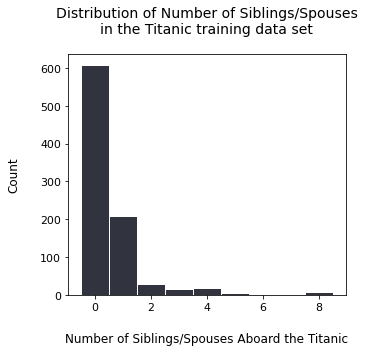

In [112]:
# Plot the distribution of SibSp
fig = plt.figure(
    figsize=(
        FIG_WIDTH_INCHES,
        FIG_HEIGHT_INCHES
    )
)
ax = fig.add_subplot(111)
plot_histogram(
    axis=ax,
    data_frame=train_data,
    data_column_string="SibSp",
    bins_list=list(np.arange(10)),
    colour_string=TITANIC_COLOUR,
    xlabel_string="Number of Siblings/Spouses Aboard the Titanic",
    ylabel_string="Count",
    title_string="Distribution of Number of Siblings/Spouses\nin the Titanic training data set",
    linewidth_num=1,
    alignment_string="left"
)
plt.tight_layout()
plt.show()

We see that the vast majority of passengers aboard the Titanic were single. About 200 people were travelling with one companion, and much fewer travelled with more than one companion. Let's examine the number of siblings and spouses among those who survived and those who perished.

In [113]:
train_data.loc[
    (train_data["Survived"]==0),
    "SibSp"
].value_counts()

0    398
1     97
2     15
4     15
3     12
8      7
5      5
Name: SibSp, dtype: int64

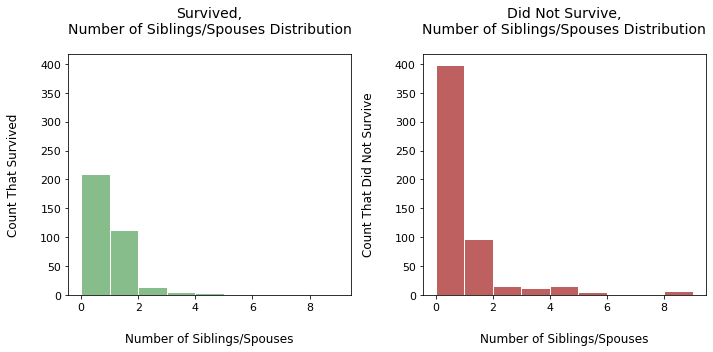

In [116]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(
    FIG_WIDTH_INCHES * 2, 
    FIG_HEIGHT_INCHES
)

bin_list = list(np.arange(10))
plot_histogram(
    axis=ax1,
    data_frame=train_data[
        train_data["Survived"]==1
    ],
    data_column_string="SibSp",
    bins_list=bin_list,
    colour_string=SURVIVED_COLOUR,
    xlabel_string="Number of Siblings/Spouses",
    ylabel_string="Count That Survived",
    title_string="Survived,\nNumber of Siblings/Spouses Distribution",
    linewidth_num=1,
)

plot_histogram(
    axis=ax2,
    data_frame=train_data[
        train_data["Survived"]==0
    ],
    data_column_string="SibSp",
    bins_list=bin_list,
    colour_string=DID_NOT_SURVIVE_COLOUR,
    xlabel_string="Number of Siblings/Spouses",
    ylabel_string="Count That Did Not Survive",
    title_string="Did Not Survive,\nNumber of Siblings/Spouses Distribution",
    linewidth_num=1,
)

# Adjust the x-limits on the first plot to match that of the second
ax1.set_ylim(
    ax2.get_ylim()
)
plt.tight_layout()
plt.show()

The distributions of the number of siblings/spouses for both the populations that survived and didn't survive seem similar. More single passengers survived thatn passengers travelliing with one or more companion. Travelling with more spouses/siblings correlates with not surviving.

The number of siblings/spouses is not as strong a determinant of survival as, say, ticket class.

## Feature Engineering

The `Age` attribute has a lot of null values. Let's start by finding the median age of passengers by `Sex` and `Pclass`. These lines are taken from [here](https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial)

In [108]:
age_by_pclass_sex = train_data.groupby(['Sex', 'Pclass']).median()['Age']
age_by_pclass_sex = age_by_pclass_sex.reset_index()
age_by_pclass_sex

,Sex,Pclass,Age
0,female,1,35.0
1,female,2,28.0
2,female,3,21.5
3,male,1,40.0
4,male,2,30.0
5,male,3,25.0


In [109]:
def impute_age(df, age_by_pclass_sex):
    for sex in ['male', 'female']:
        for c in [1,2,3]:
            df.loc[(df.Age.isnull()) & 
                   (df.Sex == sex) & 
                   (df.Pclass == c), "Age" ] =  float(age_by_pclass_sex.loc[(age_by_pclass_sex.Sex == sex) &
                                                                      (age_by_pclass_sex.Pclass == c), "Age"])
    
    # df_to_return["Age"] = train_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
    return df
train_data = impute_age(train_data, age_by_pclass_sex)
test_data = impute_age(test_data, age_by_pclass_sex)

Let's get the titles of people from their name. The names are all in order of `last_name, title. first_name last_name`. So, let's split on the `,` and the `.`

In [110]:
def get_titles(df, print_value_counts = False):
    titles = df["Name"].apply(lambda x: ((x.split(',')[1]).split('.')[0]).strip())
    titles = pd.DataFrame(titles).rename(columns={"Name": "Title"})
    if print_value_counts:
        print(pd.value_counts(titles["Title"]))
    return pd.DataFrame(titles)
train_titles = get_titles(train_data, print_value_counts=True)
test_titles = get_titles(test_data)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Ms                1
Don               1
Capt              1
Sir               1
Jonkheer          1
Mme               1
the Countess      1
Lady              1
Name: Title, dtype: int64


So, we see there are many `Mr`, `Miss`, `Mrs`, and `Master`, and much fewer of the other. Let's add a column `Title` to `train_data` that will hold one of `Mr`, `Mrs` (or `Mme`), `Miss` (or `Mlle`), `Master` or `Other`. Then, encode these using `OrdinalEncoder`

In [111]:
def sort_titles(title):
    if title == "Mr" or title == "Mrs" or title == "Mme" or title == "Miss" or title == "Mlle" or title == "Master":
        return "Common"
#     elif title == "Mrs" or title == "Mme":
#         return "Mrs"
#     elif title == "Miss" or title == "Mlle":
#         return "Miss"
#     elif title == "Master":
#         return "Master"
    else:
        return "Other"
train_data["Title"] = train_titles["Title"].apply(lambda x: sort_titles(x))
test_data["Title"] = test_titles["Title"].apply(lambda x: sort_titles(x))

Now, we see that in the test data, there is one `Fare` value which is null; imput it with the median.

In [112]:
from statistics import median
def impute_fare(df):
    df.loc[(df.Fare.isnull()), "Fare"] = median(df['Fare'])
    return df
train_data = impute_fare(train_data)
test_data = impute_fare(test_data)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Common
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Common
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Common
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Common
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Common


Now, let's see 

# Machine Learning Algorithm

In [120]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Title", "Fare"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('random_forest_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


This scored 78%

In [ ]:
from sklearn.linear_model import SGDClassifier

y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Title"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X, y)
predictions = sgd_clf.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('sgd_classifier_submission.csv', index=False)
print("Your submission was successfully saved!")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Title"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

knn_clf = KNeighborsClassifier()
knn_clf.fit(X, y)
predictions = knn_clf.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('knn_classifier_submission.csv', index=False)
print("Your submission was successfully saved!")